### Linear Regression Bonus Challenge

This notebook provides (optional) questions for you to explore Linear Regression models, and how they're implemented in the python ecosystem. 

The notebook consists of four different parts:

 - **Model Interpretation:** How to better understand the impact of your coefficient values on your target variable.
 - **Statistical testing with Statsmodels:** Use a companion library to better interpret regression results
 - **Extending SKlearn:** Using the `preprocessing` module to make model building more efficient
 - **Regression Concept Deep Dive:** Looking at some of the fundamental equations of regression models to better understand how they operate.
 
You can answer these questions in any order, as best suits your needs.

## Model Interpretation

This section asks different questions about interpreting the coefficients of regression models.  

To answer them, fit an instance of `LinearRegression` on the `housing.csv` dataset using `PRICE` as the target variable and every other column as part of `X`.  Make sure your data is standardized.

**Question 1).** Standardizing your data changes your coefficients, but not your final results.  Can you explain this effect graphically?  (**Hint:** Histograms help a lot).

In [117]:
# your answer here
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [118]:
house = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

In [119]:
house.shape

(506, 14)

In [120]:
X = house.iloc[:,:13]
y = house['PRICE']

In [121]:
lreg = LinearRegression()

In [143]:
lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [124]:
lreg.intercept_

36.459488385090005

In [144]:
lreg.score(X,y)

0.7406426641094094

In [126]:
coeff_nonstandard = pd.DataFrame({
    'Variable': X.columns,
    'Weight':lreg.coef_
})

In [127]:
X_2 = (X-X.mean())/(X.std())

In [128]:
X_stand = X_2.iloc[:,:13]
y_stand = house['PRICE']

In [149]:
lreg.fit(X_stand, y_stand)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

In [131]:
coeff_stand = pd.DataFrame({
    'Variable':X_stand.columns,
    'Weight': lreg.coef_
})

In [132]:
lreg.score(X_stand, y_stand)

0.7406426641094095

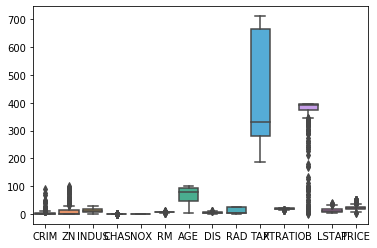

In [133]:
import matplotlib.pyplot as plt
sns.boxplot(data = house);

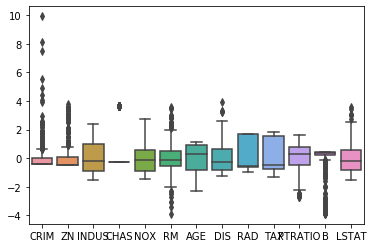

In [134]:
sns.boxplot(data = X_2);

In [145]:
house['PREDICT'] = lreg.predict(X)

In [146]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICT,PREDICT2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524,27.943524


In [151]:
house['PREDICT2'] = lreg.predict(X_stand)

In [152]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICT,PREDICT2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524,27.943524


In [138]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


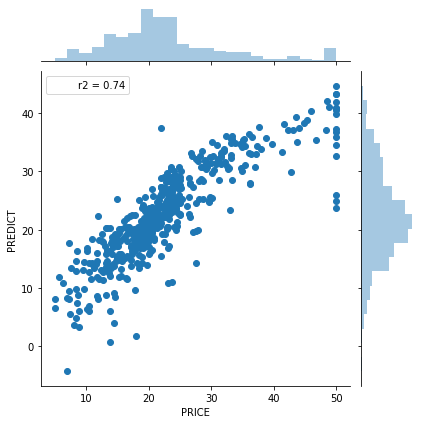

In [153]:
sns.jointplot(x='PRICE', y ='PREDICT', data = house, stat_func=r2);

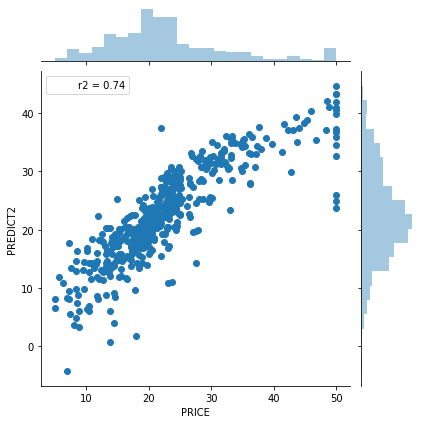

In [154]:
sns.jointplot(x='PRICE', y ='PREDICT2', data = house, stat_func=r2);

**Question 2).** With standardized data, each column has an average value of 0 and a standard deviation of 1.  This means if the value of a column is its average, it will have no additional effect on the price of a house, and the observed coefficient value comes from increasing/decreasing the column value 1 standard deviation from where it's at.  

With that being said......

**What is the impact of adding one additional room to a house's selling price?**  (**Note:**  This is NOT asking what happens if you increase the number of rooms by one standard deviation.  Just ONE room).

In [173]:
# your answer here
house.head()

house_2['RM'] = house_2['RM']+1

In [177]:
house_2['PREDICT3'] = lreg.predict(X_stand)

In [178]:
house_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICT,PREDICT2,PREDICT3
0,0.00632,18.0,2.31,0,0.538,7.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843,30.003843,30.003843
1,0.02731,0.0,7.07,0,0.469,7.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562,25.025562,25.025562
2,0.02729,0.0,7.07,0,0.469,8.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597,30.567597,30.567597
3,0.03237,0.0,2.18,0,0.458,7.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036,28.607036,28.607036
4,0.06905,0.0,2.18,0,0.458,8.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524,27.943524,27.943524


**Question 3).** If a house has 3 rooms in it, what would be the expected change in the house's selling price as a result?

In [179]:
# your answer here

lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

### Regression Deep Dive With Statsmodels

There are two main libraries for statistical methods in Python.  `SKLearn` and `Statsmodels`.  They are similar in their ambitions, but slightly different in their scope.  `SKlearn` is built around the idea of using a dataset to make predictions, whereas `Statsmodels` is built on the idea of producing test statistics to provide insight into your results.  

We'll spend most of the class using `SKLearn`, but `Statsmodels` provides useful information about a model.  

This next code block will discuss its basic syntax.

In [1]:
# here we are randomly generating fake data, to use in a dataframe
import numpy as np
import pandas as pd

fake_data = {
    'A': np.random.normal(1, 3, size=100),
    'B': np.random.normal(2, 1, size=100),
    'C': np.random.normal(6, 2, size=100)
}

# turn it into a dataframe
data = pd.DataFrame(fake_data)

data.head()

,A,B,C
0,5.624049,2.239349,7.550796
1,-0.143184,0.168013,4.128146
2,-3.682560,2.824098,3.024974
3,4.567026,2.477025,6.299544
4,2.927780,2.846819,7.039547


**Fitting a Regression Model With Statsmodels**

In [3]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# declare X and y
X = data[['A', 'B']]
y = data['C']

X_std = (X - X.mean()) / X.std()

# this step might look a little weird, but bare with me for now
X_std = add_constant(X_std)

# this is the equivalent of doing lreg = LinearRegression() that we did previously
# notice that you put y before X
mod = sm.OLS(y, X_std)

# because we loaded in y and X previously, no need to use them here
results = mod.fit()

# the results() object provides a lot of data, most importantly the summary(), which we can see here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4499
Date:                Sat, 23 Nov 2019   Prob (F-statistic):              0.639
Time:                        11:16:47   Log-Likelihood:                -217.12
No. Observations:                 100   AIC:                             440.2
Df Residuals:                      97   BIC:                             448.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7765      0.215     26.815      0.0

These results might seem a bit overwhelming at first, but let's take a step back and evaluate what we're looking at.

First, the results:

 - Not surprisingly, our r-squared value is hovering right around 0, which should be expected given that we're dealing with random data
 - In a similar vein, we should expect the coefficients for A and B are also right around 0, indicating they have no discernible impact on the value of C.
 
Next, let's take a look at the middle section of the summary which lists the values for `coef`, `std err`, `t`, `P>|t|`, and `[0.025  0.975]`.

What's important here is that when a linear model derives a coefficient, it's not meant to be a static value, but rather the **average value for an observed distribution**. 

Or to rephrase the issue, when we see that the coefficient value of A is 0.0239, this means that if we were to re-run a similar experiment many times, 0.0239 is the value we would expect to observe most frequently, and we should expect that value of the coefficient of A to have a standard error (very similar to the standard deviation) of 0.187.

With the information from above, we can easily derive **confidence intervals** for our coefficients, which you can see above in the column denoted `[0.025  0.975]`.

Basically, this number means, 95% of the time we should expect the value of this coefficient to be between these two values.

Two points:

 - This is a useful metric to figure out high and low estimations for a particular column's impact
 - Coefficients that have a 95% confidence interval that passes over 0 are good candidates to be removed from your model

**Question 4).**  Use `statsmodels` to run a regression model on your dataset, and observe your results.  Then, find out.....**what variables are good candidates to be removed from your dataset?**

Don't forget to use the `add_constant` method to get valid results.

In [4]:
# your answer here

house_2 = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

In [6]:
X_4 = house_2.iloc[:,:13]
y_4 = house_2['PRICE']

X_std = (X_4 - X_4.mean()) / X_4.std()

X_std = add_constant(X_std)

In [7]:
mod = sm.OLS(y_4, X_std)

In [8]:
results = mod.fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 23 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        11:20:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

**Question 5).** Re-run your regression model without the `add_constant` function, and observe the changes in your results.  Any idea what it's doing?

In [10]:
# your answer here

mod_no_constant = sm.OLS(y_4, X_4)

results_no_constant = mod_no_constant.fit()

print(results_no_constant.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 23 Nov 2019   Prob (F-statistic):                        0.00
Time:                        11:21:46   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Extending Scikit Learn

An under appreciated benefit of `SKlearn` is that it comes with a number of additional modules that make it easier to process and build models, regardless of what technique you are using.  

One such module is the `preprocessing` module, which we'll take a look at here.

The `preprocessing` module contains a number of built-in functions for shaping data, before feeding them into a model.  You can see more detail about it here:  https://scikit-learn.org/stable/modules/preprocessing.html

They allow you to import different modules that allow you to shape your data in particular ways.  For example, the `StandardScaler` module allows you to center your data in a way we described in class. 

**The Transformer API**

The API in `SKLearn` basically follows two different patterns:  

 - one for algorithms that you fit your data on
 - one for modules that transform your data into something else
 
 If you're using an algorithm, your best friends are `fit()`, `predict()`, and `score()`.  However, if you're using a transformer, your main function calls happen in three different ways:
 
 - `fit()`: find the appropriate values for your columns and store them
 - `fit_transform()`:  do the same as `fit()`, but also change the data that you call it on
 - `transform()`: reshape a dataset based on the stored values from the `fit()` method
 
Let's take a look to see how it works:

In [11]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# initialize it, just like you would an algorithm
sc = StandardScaler()

# if you want to transform a dataset, and store its values, you use the fit_transform() method
scaled_data = sc.fit_transform(X)

Anytime you invoke the `fit()` method using a module that has the transformer API, you can then access the stored values of the data you transformed for later use.

In [12]:
# the average values of the columns
sc.mean_

array([0.83433634, 2.08882986])

In [14]:
# their variances
sc.var_

array([7.94517892, 1.13854336])

Now, if you want, you can call the `transform()` method on *new* data, and transform it according to the stored values from your old data.

In [15]:
# we'll make another fake dataframe

other_data = {
    'A': np.random.normal(1, 3, size=100),
    'B': np.random.normal(2, 1, size=100),
    'C': np.random.normal()
}

other_data = pd.DataFrame(other_data)

In [16]:
# and then standardize it using the scaler
# notice how we're using just the transform() method
other_data = sc.transform(other_data)

ValueError: operands could not be broadcast together with shapes (100,3) (2,) (100,3) 

Now, if you look at the original data that we scaled, its average values are a clean 0, and its variances a clean 1:

In [17]:
print(scaled_data.mean(0), scaled_data.var(0))

[-4.62130334e-17  7.52176099e-16] [1. 1.]


But the data that was later transformed has values that are just a little bit different, because its using the means and variances of the data it was originally fit on.

In [33]:
print(other_data.mean(0), other_data.var(0))

[-0.27987504 -0.01137965] [1.35632956 0.75008325]


This is useful when dealing with training and test sets.

**Question 6a):** Create a training and test set from the housing data.  Use the `StandardScaler` to transform your training data, and then do the same on the test set, using the stored values from the `fit_transform()` method.

In [ ]:
# your code here

## Regression:  Concept Deep Dive

**Warning:**  This section is going beyond what might be considered practical use of what's covered in class.  If you are happy just to be able to use different API calls in one library or another to get results, then you can skip this next section.

However, I find lots of people are secretly 'Math curious', and enjoy a feeling of empowerment by being able to decipher certain types of formal concepts that they may have previously perceived to be inscrutable.  

Transforming the mysterious to the mundane is a kind of magical process.  It also makes the latest technology du jour boring in a good way, because you (correctly) perceive them to be just temporary ways of being able to employ different concepts that are much more permanent.  Libraries come and go on a five-year cycle, but the ideas they manipulate are practically immortal.

So if you would like to arrive at a deeper, more nuanced understanding of what's driving our results, then feel free to complete the following sections.

### Univariate Regression:  Concept Deep Dive

In previous classes, we took a closer look at some basic statistical definitions which reuse themselves over and over.

In particular:

1. **Standard Deviation:** A scaled measure of dispersion around the center of a normal distribution.
2. **Variance:**  A non-scaled measure of dispersion that measures the **total amount** of dispersion a particular column has around its average.  
3. **Covariance:** A metric that tracks the total amount of variability between two columns
4. **Correlation:** A metric that scales the covariance between variables to a value that's between -1 and 1, by dividing it by the standard deviations of deach column.

**Univariate Linear Regression**

We can take these basic definitions and use them relatively easily to arrive at the parameters for a linear regression model with one predictor.  

The equation for univariate linear regression is the following:

 $$ y = \beta_{1}x + \beta_{0} $$
 
 Here, $ \beta_{1} $ is the coefficient for $ x $, and $ \beta_{0} $ is the intercept.  
 
 Ie, this is a greek letter version of the formula $ y = mx + b $
 
 When solving for this, you want to find out the slope of the line for $x$ and its intercept.  These numbers are fairly easily derived from the definitions given above.  
 
The formula for finding the coefficient of $x$ is the following:

$$ \beta_{1} =  \frac{\frac{1}{n - 1}\sum{(x_{i} - \bar{x})(y_{i} - \bar{y})}}{\frac{1}{n-1}\sum{(x_{i} - \bar{x})^2}}  $$

This expression might look daunting, but if you're getting some mental indigestion, just take a step back, relax, and remind yourself of what we've already learned.  It's a simple recombination of what's been covered so far in class.

Look at the numerator in the above expression.  Do you recognize what it is?  

What about the denominator?  

If it's not immediately clear what the formula for $ \beta_{1} $ is asking of you, take a few minutes to see if you can figure it out.  

We'll wait a few minutes before we go on to the next section.

Okay.....hopefully by now you've taken at least a few minutes to try and connect the dots.  But if you want to get straight to the point, here's what the above formula boils down to:

$$ \beta_{1} = \frac{covar(x, y)}{var(x)} $$

Ie, to get the slope of the line, you simply divide the covariance of x and y, by the variance of x.  That's it!

In a similar vein, the formula for deriving the intercept is also relatively straight forwrad.  

It's given by the following:  

$$ \beta_{0} = \bar{y} - \beta_{1}\bar{x} $$

ie, take the average value of y, and subtract the value of the slope multiplied by the average of x.

**Question 7).** Your turn.  See if you can derive the slope and intercept for a univariate regression model that uses the `RM` column for `X`, and the `PRICE` column for `y`.  You don't have to standardize your data for this one.  You should be able to use `SKlearn` to double check your results.

In [ ]:
# your code here

## Multivariate Regression:  Concept Deep Dive

Deriving the coefficients for multivariate regression is a little more involved, but can ultimately be done in one step.  

There are five or six different ways to get them working, but the most commonly identified way of doing so is given by the following expression:

$$ \beta = (X^TX)^{-1}X^Ty $$

Where $ \beta $ is the set of all coefficients.

To get this expression working, there are a few additional details you should be aware of.  

 - The 'T' in the superscript is the transpose of a matrix, which inverts the columns and rows of a matrix
  - In numpy this would be done simply by calling `X.T`
 - Multiplying matrices is not the same as multiplying regular numbers.  Ie, the expression $XX$ is not just $X$ * $X$. Rather it would be the following numpy expression:  `X.dot(X)`
 - The '-1' in the superscript is the *inverse* of $ X^TX $.  It's basically the matrix equivalent of dividing a number by one.   - In numpy, you do this by calling the method `np.linalg.inv()`
 
If you can connect those dots, you should be able to arrive at the values of your coefficients by hand.  

**Question 8a).**  See if you can crack the above expression to arrive at your coefficients.  Make sure you are using a standardized version of your data.

**Hint:** Matrix operations are picky about dimensions.  You should expect to get several error messages saying 'the dimensions of such and such are not aligned' while trying to arrive at the correct answer.  Be prepared, and don't let it discourage you.

In [ ]:
# your code here

**Question 8b).**  Do you see what $X^TX$ is? 